# Welcome to my boat project

#### The goal of the project is to analyse a dataset of various boats avaliable on sale, notice patterns in the data and see what are the most popular boat features on the market.

#### After analysing the data, a regression model is build with the goal of predicting boat prices using linear regression and ANN's.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_01 = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\boats_final_2.csv',sep=",",error_bad_lines=False)

In [3]:
df_01.head()

,Year Built,Condition,Length x Width,Material,Certified No. of Persons,No. of Cabins,Propulsion,Engine,Engine Performance,Engine Hours,Model,Type,Location,Price
0,1984.0,As new,5.85 m x 2.25 m,GRP,4 Persons,1 Cabin,Sterndrive,Volvo Penta 145 A,1 x 130 HP / 96 kW,1'100 h,Sealine Conti 19,Cabin Cruiser,Germany » Brandenburg »,"apx. £ 21,400"
1,NaN,good condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dinghy Sailing Simulator (VS-C1),Other,Location not available,"apx. £ 6,620"
2,1990.0,fair condition,6.70 m,GRP,NaN,1 Cabin,"Outboard, four-stroke",Yamaha,1 x 6.0 HP / 4.4 kW,NaN,Etap 22 i,Sailing Yacht,Location not available,"£ 6,950"
3,2016.0,good condition,5.95 m x 2.40 m,GRP,6 Persons,NaN,NaN,NaN,NaN,NaN,Astus Trimaran 20.2 XL Cerebelleux,Sailing Yacht,Location not available,"apx. £ 19,600"
4,2020.0,As new,13.20 m x 7.80 m,GRP,12 Persons,3 Cabins,Saildrive,Yanmar 4JH57 x2,2 x 57 HP / 42 kW,505 h,Lagoon 42,Catamaran,Spain »,"£ 499,000"


In [4]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279 entries, 0 to 12278
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year Built                9864 non-null   float64
 1   Condition                 3560 non-null   object 
 2   Length x Width            11597 non-null  object 
 3   Material                  8558 non-null   object 
 4   Certified No. of Persons  4621 non-null   object 
 5   No. of Cabins             5848 non-null   object 
 6   Propulsion                5548 non-null   object 
 7   Engine                    9251 non-null   object 
 8   Engine Performance        8653 non-null   object 
 9   Engine Hours              4182 non-null   object 
 10  Model                     12279 non-null  object 
 11  Type                      11159 non-null  object 
 12  Location                  12279 non-null  object 
 13  Price                     12279 non-null  object 
dtypes: flo

In [5]:
(df_01.isnull().sum()/df_01.shape[0])*100

Year Built                  19.667725
Condition                   71.007411
Length x Width               5.554198
Material                    30.303771
Certified No. of Persons    62.366642
No. of Cabins               52.373972
Propulsion                  54.817168
Engine                      24.659989
Engine Performance          29.530092
Engine Hours                65.941852
Model                        0.000000
Type                         9.121264
Location                     0.000000
Price                        0.000000
dtype: float64

In [6]:
df_01.isnull().sum()

Year Built                  2415
Condition                   8719
Length x Width               682
Material                    3721
Certified No. of Persons    7658
No. of Cabins               6431
Propulsion                  6731
Engine                      3028
Engine Performance          3626
Engine Hours                8097
Model                          0
Type                        1120
Location                       0
Price                          0
dtype: int64

In [7]:
df_01.dtypes

Year Built                  float64
Condition                    object
Length x Width               object
Material                     object
Certified No. of Persons     object
No. of Cabins                object
Propulsion                   object
Engine                       object
Engine Performance           object
Engine Hours                 object
Model                        object
Type                         object
Location                     object
Price                        object
dtype: object

In [8]:
for i in df_01:
    print('Column: ',i)
    print('')
    print(df_01[i].value_counts())
    print('')

Column:  Year Built

2022.0        1679
2021.0         679
2008.0         332
2007.0         291
2006.0         288
              ... 
1909.0           1
1889.0           1
1.0              1
1894.0           1
19892015.0       1
Name: Year Built, Length: 131, dtype: int64

Column:  Condition

good condition         2058
As new                  950
used                    211
new                     167
fair condition           89
to be done up            45
very good condition      37
defect                    3
Name: Condition, dtype: int64

Column:  Length x Width

9.00 m x 3.00 m     33
12.00 m x 4.00 m    27
7.50 m x 2.50 m     25
6.55 m x 2.54 m     25
5.94 m x 2.54 m     23
                    ..
14.10 m x 4.28 m     1
8.20 m x 2.59 m      1
3.51 m x 1.70 m      1
27.96 m x 6.25 m     1
10.29 m x 3.00 m     1
Name: Length x Width, Length: 7315, dtype: int64

Column:  Material

GRP                    6238
Steel                   897
Wood                    460
Aluminium          

## We imediately need to start cleaning and manipulating data so it's readable

In [9]:
# SEPERATE LOCATION COUNTRIES

def countries(locations):
    country_list = []
    
    for i in range(len(locations)):
        country = df_01['Location'][i].split('»')[0]
        country_list.append(country)
    return country_list

In [10]:
df_01['Location_Country'] = countries(df_01['Location'])

In [11]:
df_01

,Year Built,Condition,Length x Width,Material,Certified No. of Persons,No. of Cabins,Propulsion,Engine,Engine Performance,Engine Hours,Model,Type,Location,Price,Location_Country
0,1984.0,As new,5.85 m x 2.25 m,GRP,4 Persons,1 Cabin,Sterndrive,Volvo Penta 145 A,1 x 130 HP / 96 kW,1'100 h,Sealine Conti 19,Cabin Cruiser,Germany » Brandenburg »,"apx. £ 21,400",Germany
1,NaN,good condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dinghy Sailing Simulator (VS-C1),Other,Location not available,"apx. £ 6,620",Location not available
2,1990.0,fair condition,6.70 m,GRP,NaN,1 Cabin,"Outboard, four-stroke",Yamaha,1 x 6.0 HP / 4.4 kW,NaN,Etap 22 i,Sailing Yacht,Location not available,"£ 6,950",Location not available
3,2016.0,good condition,5.95 m x 2.40 m,GRP,6 Persons,NaN,NaN,NaN,NaN,NaN,Astus Trimaran 20.2 XL Cerebelleux,Sailing Yacht,Location not available,"apx. £ 19,600",Location not available
4,2020.0,As new,13.20 m x 7.80 m,GRP,12 Persons,3 Cabins,Saildrive,Yanmar 4JH57 x2,2 x 57 HP / 42 kW,505 h,Lagoon 42,Catamaran,Spain »,"£ 499,000",Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,NaN,NaN,9.35 m,NaN,8 Persons,NaN,NaN,NaN,NaN,NaN,Nimbus Commuter 9,NaN,Location not available,Price not available,Location not available
12275,NaN,NaN,9.35 m,NaN,8 Persons,NaN,NaN,NaN,NaN,NaN,Nimbus Tender 9,NaN,Location not available,Price not available,Location not available
12276,NaN,NaN,9.99 m x 2.99 m,NaN,10 Persons,NaN,NaN,NaN,NaN,NaN,Frauscher 1017 GT Air,NaN,Location not available,Price not available,Location not available
12277,NaN,NaN,37.45 m x 8.35 m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oyster 1225,NaN,Location not available,Price not available,Location not available


In [12]:
# SEPERATE THE LENGTHS AND WIDTHS
# SOME DON'T HAVE WIDTH, THAT WILL BE NAN

def length(size):
    length_list = []
    
    for i in range(len(size)):
        if pd.isna(df_01['Length x Width'][i])==False:
            length = df_01['Length x Width'][i].split('x')[0].strip(' m ').strip('')
            length_list.append(length)
        else:
            length_list.append(np.nan)
    return length_list

In [13]:
df_01['Length'] = length(df_01['Length x Width'])

In [14]:
# SAME THING BUT FOR WIDTH

def width(size):
    width_list = []
    
    for i in range(len(size)):
        try:
            if pd.isna(df_01['Length x Width'][i])==False:
                width = df_01['Length x Width'][i].split('x')[1].strip(' m ').strip('')
                width_list.append(width)
            else:
                width_list.append(np.nan)
        except:
            width_list.append(np.nan)
    return width_list

In [15]:
df_01['Width'] = width(df_01['Length x Width'])

In [16]:
# CHANGE LENGTH AND WIDTH TO FLOAT

df_02 = df_01.copy()
df_02[['Length','Width']].replace(' ',np.nan,inplace=True)

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
# DROPPING SOME MISSING VALUES

df_02.drop(df_02[df_02['Length']==''].index,inplace=True)

In [18]:
# CHANGING DATA TYPE

df_02[['Length','Width']] = df_02[['Length','Width']].astype('float')

In [19]:
df_03 = df_02.copy()

In [20]:
# STRIP NO OF PERSONS OF 'PERSONS'

df_03['Certified No. of Persons'] = df_03[df_03['Certified No. of Persons'].notnull()]['Certified No. of Persons'].apply(lambda x:x.strip('Person '))

In [21]:
# CHANGE NO OF PERSON TO INT

df_03['Certified No. of Persons'] = df_03[df_03['Certified No. of Persons'].notnull()]['Certified No. of Persons'].astype('int')

In [23]:
# STRIP CABINS FROM NO. OF CABINS AND CHANGE TO INT

df_03['No. of Cabins'] = df_03[df_03['No. of Cabins'].notnull()]['No. of Cabins'].apply(lambda x:x.strip('Cabins '))
df_03['No. of Cabins'] = df_03[df_03['No. of Cabins'].notnull()]['No. of Cabins'].astype('int')

In [24]:
# PROPULSION SEEMS OK, JUST A LOT OF NANS

df_03['Propulsion'].value_counts()

Inboard Direct-Drive     2150
Outboard, four-stroke    1633
Sterndrive               1088
Saildrive                 314
Inboard V-Drive           121
POD Drive                 103
Outboard, two-stroke       70
Jet Drive                  38
Forward Drive              20
Surface Drive               7
Hydraulic Drive             4
Name: Propulsion, dtype: int64

In [ ]:
# STRIP 2X, STIP HORSEPOWER AND NUMBERS, LEAVE JUST THE ENDING BRAND

In [26]:
df_03['Engine'].value_counts()[:20]

Volvo Penta       483
Yanmar            424
Mercury           282
Yamaha            229
MAN               175
Mercruiser        132
Volvo             101
MTU                96
Caterpillar        87
Honda              72
Suzuki             68
YAMAHA             67
Cummins            58
VOLVO PENTA        58
YANMAR             54
Perkins            48
Vetus              38
MERCURY            37
Man                36
Volvo Penta D6     32
Name: Engine, dtype: int64

In [27]:
# EDIT THE NAMES OF THE TOP 20 ENGINE BRANDS

df_03['Engine'] = df_03['Engine'].replace({'CATERPILLAR': 'Caterpillar',
                                          'SUZUKI':'Suzuki',
                                          'Man Engine':'MAN',
                                          'Man':'MAN',
                                          'Caterpillar 3208':'Caterpillar',
                                          'Honda Marine':'Honda',
                                          'CUMMINS':'Cummins',
                                          'IVECO':'Iveco',
                                          'PERKINS':'Perkins',
                                          'perkins':'Perkins'})

In [28]:
# CLEAN VOLVO ENGINES

def volvo(array):

    temp_list = []

    for i in range(len(array)):
        try:

            if pd.isna(array[i])==False:
                if 'volvo' in array[i].lower():
                    a = array[i].replace(array[i],'Volvo Penta')
                    temp_list.append(a)
                else:
                    temp_list.append(array[i])
            else:
                temp_list.append(np.nan)
        except:
            temp_list.append(np.nan)
            
    return temp_list

In [29]:
df_03['Engine'] = volvo(df_03['Engine'])

In [30]:
# CLEAN YANMAR ENGINES

def yanmar(array):

    temp_list = []

    for i in range(len(array)):
        try:
            if pd.isna(array[i])==False:
                if 'yanmar' in array[i].lower():
                    a = array[i].replace(array[i],'Yanmar')
                    temp_list.append(a)
                else:
                    temp_list.append(array[i])
            else:
                temp_list.append(np.nan)
        except:
            temp_list.append(np.nan)
            
    return temp_list

In [31]:
df_03['Engine'] = yanmar(df_03['Engine'])

In [32]:
# CLEAN MERCURY ENGINES

def mercury(array):

    strings = ['mercury','mercruiser']
    temp_list = []

    for i in range(len(array)):
        try:
            if pd.isna(array[i])==False:
                if any(x in array[i].lower() for x in strings):
                    a = array[i].replace(array[i],'Mercury')
                    temp_list.append(a)
                else:
                    temp_list.append(array[i])
            else:
                temp_list.append(np.nan)
        except:
            temp_list.append(np.nan)
            
    return temp_list

In [33]:
df_03['Engine'] = mercury(df_03['Engine'])

In [34]:
# CLEAN YAMAHA ENGINES

def yamaha(array):

    strings = ['yamaha']
    temp_list = []

    for i in range(len(array)):
        try:
            if pd.isna(array[i])==False:
                if any(x in array[i].lower() for x in strings):
                    a = array[i].replace(array[i],'Yamaha')
                    temp_list.append(a)
                else:
                    temp_list.append(array[i])
            else:
                temp_list.append(np.nan)
        except:
            temp_list.append(np.nan)
            
    return temp_list

In [35]:
df_03['Engine'] = yamaha(df_03['Engine'])

In [36]:
# CLEAN PERKINS ENGINES

def perkins(array):

    strings = ['perkins']
    temp_list = []

    for i in range(len(array)):
        try:
            if pd.isna(array[i])==False:
                if any(x in array[i].lower() for x in strings):
                    a = array[i].replace(array[i],'Perkins')
                    temp_list.append(a)
                else:
                    temp_list.append(array[i])
            else:
                temp_list.append(np.nan)
        except:
            temp_list.append(np.nan)
            
    return temp_list

In [40]:
df_03['Engine'].value_counts()[20:]

Lombardini                                         10
PCM                                                 9
DAF 575                                             9
Piktronik                                           9
-                                                   8
                                                   ..
Outboard 250 PS                                     1
Solé Diesel                                         1
max 2 x 900\r\n\r\nHP                               1
9.6 v8                                              1
200cv neuf 2 heures de navigation garantie 3ans     1
Name: Engine, Length: 1372, dtype: int64

In [41]:
# REMOVING ENGINES THAT CONTAIN USELESS NUMBER IN ITS NAME

df_03 = df_03[~df_03.Engine.str.contains(r'\d',na=False)]

In [42]:
# KEEP ONLY TOP 20 ENGINE BRANDS

to_remove = df_03['Engine'].value_counts()[21:].index

In [43]:
df_03 = df_03[~df_03.Engine.isin(to_remove)]

In [44]:
df_03.Engine.unique()

array(['Volvo Penta', nan, 'Yamaha', 'Yanmar', 'Cummins', 'MTU',
       'Mercury', 'Perkins', 'MAN', 'Caterpillar', 'Honda', 'Nanni',
       'Suzuki', 'Iveco', 'Ford', 'Tohatsu', 'Vetus', 'Mercedes',
       'Peugeot', 'Lombardini', 'John Deere', 'PIKTRONIK'], dtype=object)

In [46]:
# ENGINE PERFORMANCE - REMOVE HP, REMOVE KW, MULTIPLY NUMBER OF ENGINES (THAT WAY WE WILL GET TOTAL HP)

# REMOVE ' FROM NUMBERS

df_03['Engine Performance'] = df_03['Engine Performance'].replace(r"\'",'',regex=True)

In [47]:
df_03['Engine Performance'] = df_03['Engine Performance'].replace({r"\w+\s\/\s\d+\s\w+":''},regex=True)

In [48]:
df_03['Engine Performance'] = df_03['Engine Performance'].replace({r"\w+\s\/\s\d+\.\d+\s\w+":''},regex=True)

In [50]:
# FUNCTION TO CALCULATE THE ENGINE POWER

def engine_power(array):
    
    power_list = []
    
    for i in range(len(array)):
        try:
            if pd.isna(array[i])==False:
                a = int(array[i].split('x')[0])
                b = float(array[i].split('x')[1])
                c = a * b
                power_list.append(c)
            else:
                power_list.append(np.nan)
        except:
            power_list.append(np.nan)

    return power_list

In [51]:
df_03['Engine Performance'] = engine_power(df_03['Engine Performance'])

In [52]:
df_03['Engine Performance'].isnull().sum()/df_03['Engine Performance'].shape[0]

0.3255924621680784

In [53]:
# DROPPING ENGINE HOURS BECAUSE 65% IS NAN

df_03.drop('Engine Hours',axis=1,inplace=True)

In [54]:
df_04 = df_03.copy()

In [55]:
# RENAMING ENGINE PERFORMANCE INTO ENGINE HOURSEPOWER SO ITS EASIER TO UNDERSTAND

df_04.rename(columns={'Engine Performance':'Engine Horsepower'},inplace=True)

In [56]:
df_04.Model = df_04.Model.replace(r'\d+','',regex=True)

In [58]:
# TAKING ONLY THE FIRST STRING OF THE MODEL NAME, SO WE HAVE THE BOAT BRAND

df_04.Model = df_04.Model.apply(lambda x:x.split(' ')[0])

In [59]:
# WE WILL KEEP THE TYPE FOR DATA EXPLORATION, BUT WE WILL HAVE TO REDUCE THE NUMBER OF VALUES FOR MACHINE LEARNING

df_04.Type.value_counts()

Motor Yacht                   1504
Sailing Yacht                 1251
Sport Boat                     929
Flybridge                      712
Cabin Cruiser                  563
                              ... 
Outdoor Storage                  2
Dolphins                         1
Waterskiing / Wakeboarding       1
Pedalo                           1
Fittings                         1
Name: Type, Length: 71, dtype: int64

In [60]:
# KEEPING ONLY THE LOCATION COUNTRY

df_04.Location = df_04.Location.apply(lambda x:x.split('»')[0])

In [61]:
df_04.Location.value_counts()[:20]

Germany                      2628
Switzerland                  1519
Location not available       1487
Italy                        1293
Netherlands                  1016
Spain                         650
Croatia (Hrvatska)            433
France                        341
Austria                       179
Turkey                        143
Denmark                       115
Portugal                      113
Sweden                        100
Greece                         89
Belgium                        62
Poland                         45
Virgin Islands (British)       35
Finland                        31
Slovenia                       21
Montenegro                     20
Name: Location, dtype: int64

In [62]:
df_04.drop('Location_Country',axis=1,inplace=True)

In [63]:
# CLEANING THE PRICE OF THE VALUE ICONS

df_04.Price = df_04.Price.replace(r"\w+\.\s\W",'',regex=True)

In [64]:
df_04.Price = df_04.Price.replace(r"£",'',regex=True)

In [66]:
df_04.Price = df_04.Price.replace(r',','',regex=True)

In [67]:
# REMOVE MISSING PRICES

df_04 = df_04[~df_04.Price.str.contains('Price not available')]

In [68]:
df_04.Price = df_04.Price.astype('int')

In [69]:
df_04.drop('Length x Width',axis=1,inplace=True)

## Exploratory Data Analysis

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df_04.drop(df_04[df_04['Year Built'] < 1600].index,axis=0,inplace=True)

In [73]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8971 entries, 0 to 11162
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year Built                8104 non-null   float64
 1   Condition                 2850 non-null   object 
 2   Material                  6845 non-null   object 
 3   Certified No. of Persons  3467 non-null   float64
 4   No. of Cabins             4653 non-null   float64
 5   Propulsion                4567 non-null   object 
 6   Engine                    6702 non-null   object 
 7   Engine Horsepower         6173 non-null   float64
 8   Model                     8971 non-null   object 
 9   Type                      8970 non-null   object 
 10  Location                  8971 non-null   object 
 11  Price                     8971 non-null   int32  
 12  Length                    8346 non-null   float64
 13  Width                     8276 non-null   float64
dtypes: floa

In [75]:
df_04.corr()

,Year Built,Certified No. of Persons,No. of Cabins,Engine Horsepower,Price,Length,Width
Year Built,1.000000,0.024940,-0.035819,-0.023923,0.062253,-0.161420,-0.043013
Certified No. of Persons,0.024940,1.000000,0.082068,0.019019,0.065082,0.365911,0.244221
No. of Cabins,-0.035819,0.082068,1.000000,0.020321,0.203594,0.561378,0.430350
Engine Horsepower,-0.023923,0.019019,0.020321,1.000000,-0.002050,0.069358,0.062048
Price,0.062253,0.065082,0.203594,-0.002050,1.000000,0.402318,0.340649
Length,-0.161420,0.365911,0.561378,0.069358,0.402318,1.000000,0.731967
Width,-0.043013,0.244221,0.430350,0.062048,0.340649,0.731967,1.000000


In [76]:
df_04.describe()

,Year Built,Certified No. of Persons,No. of Cabins,Engine Horsepower,Price,Length,Width
count,8104.000000,3467.000000,4653.000000,6173.000000,8.971000e+03,8346.000000,8276.000000
mean,2004.383144,8.755697,2.377391,562.387818,2.838309e+05,11.272810,3.500839
std,19.162102,11.161978,2.167596,939.439818,1.575384e+06,6.436996,1.667062
min,1850.000000,1.000000,1.000000,0.500000,1.300000e+01,0.880000,0.010000
25%,1995.000000,6.000000,1.000000,55.000000,2.100000e+04,7.010000,2.500000
50%,2008.000000,8.000000,2.000000,234.000000,6.650000e+04,10.000000,3.230000
75%,2021.000000,10.000000,3.000000,640.000000,1.914000e+05,13.700000,4.220000
max,2024.000000,600.000000,74.000000,17538.000000,8.541000e+07,100.000000,66.000000


<AxesSubplot:xlabel='Year Built', ylabel='Count'>

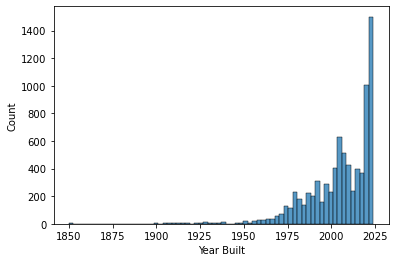

In [77]:
# WE COULD REMOVE OUTLIERS BEFORE 1900'S

sns.histplot(df_04['Year Built'])

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year Built'>

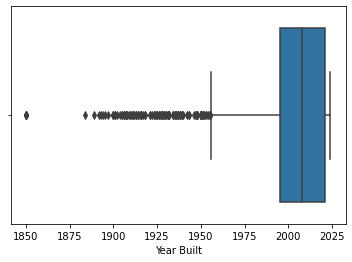

In [78]:
sns.boxplot(df_04['Year Built'])

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


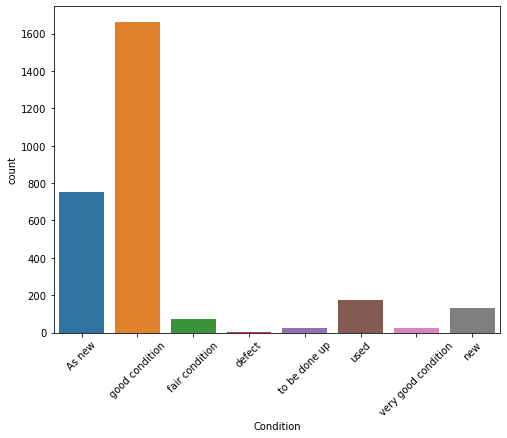

In [79]:
# MOST OF THE BOATS ARE IN GOOD CONDITION

plt.figure(figsize=(8,6))

sns.countplot(df_04['Condition'])
plt.xticks(rotation=45)
plt.show()

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


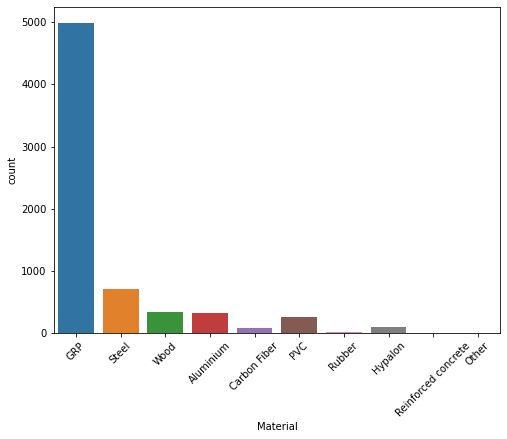

In [80]:
# MOST OF THE BOATS ARE MADE OF PLASTIC, MEANING THEY ARE ALSO MOSTLY SMALLER OR MEDIUM BOATS

plt.figure(figsize=(8,6))

sns.countplot(df_04['Material'])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Certified No. of Persons', ylabel='Count'>

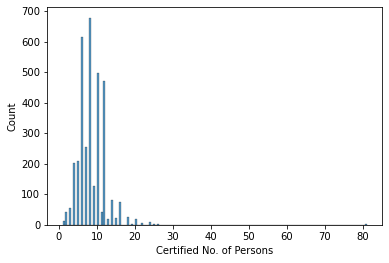

In [81]:
# WE ALSO HAVE OUTLIERS IN 'Certified No. of Persons'

sns.histplot(df_04[df_04['Certified No. of Persons']<200]['Certified No. of Persons'])

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Certified No. of Persons'>

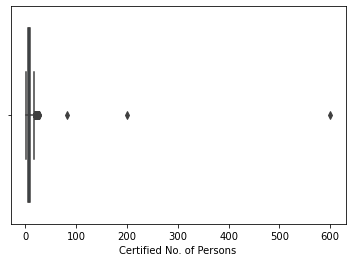

In [82]:
sns.boxplot(df_04['Certified No. of Persons'])

<AxesSubplot:xlabel='No. of Cabins', ylabel='Count'>

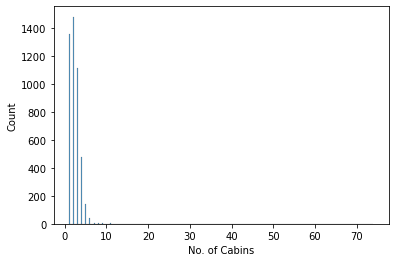

In [83]:
# OUTLIERS IN NO OF CABINS

sns.histplot(df_04['No. of Cabins'])

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No. of Cabins'>

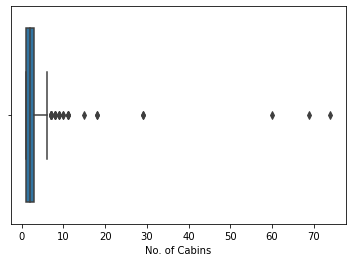

In [84]:
sns.boxplot(df_04['No. of Cabins'])

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


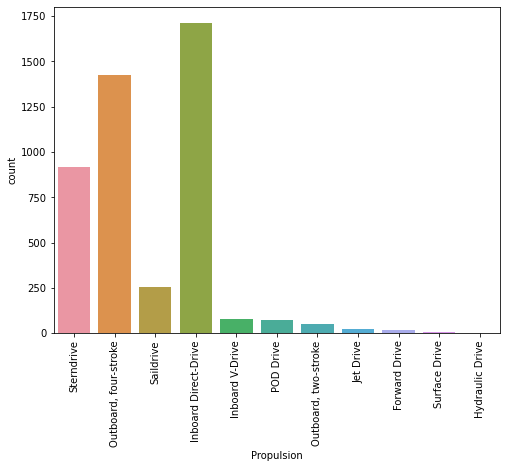

In [85]:
# MOST OF THE BOATS HAVE AN INBOARD DRIVE OR OUTBOARD ENGINE

plt.figure(figsize=(8,6))

sns.countplot(df_04['Propulsion'])
plt.xticks(rotation=90)
plt.show()

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


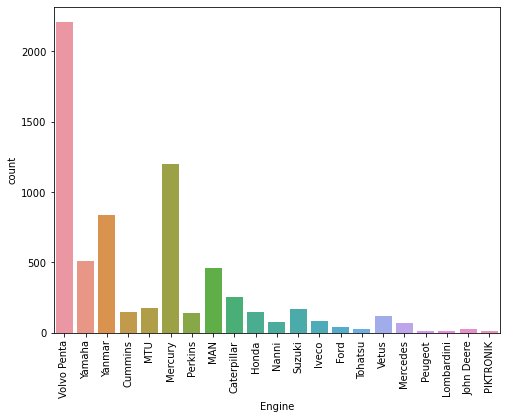

In [86]:
# VOLVO PENTA IS THE MOST USED TYPE OF ENGINE

plt.figure(figsize=(8,6))

sns.countplot(df_04['Engine'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Boat model'}>

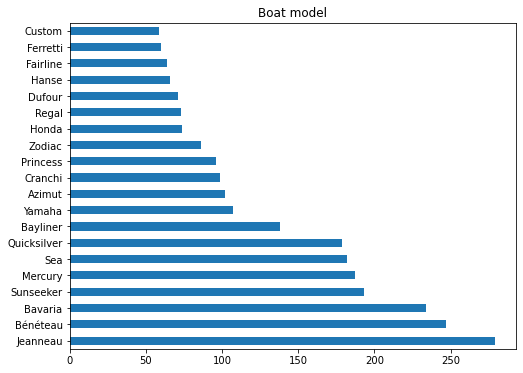

In [87]:
# JEANNEAU IS THE MOST COMMON BOAT MODEL ON THE MARKET

plt.figure(figsize=(8,6))
plt.title('Boat model')

df_04.Model.value_counts()[:20].plot(kind='barh')

<AxesSubplot:title={'center':'Boat type'}>

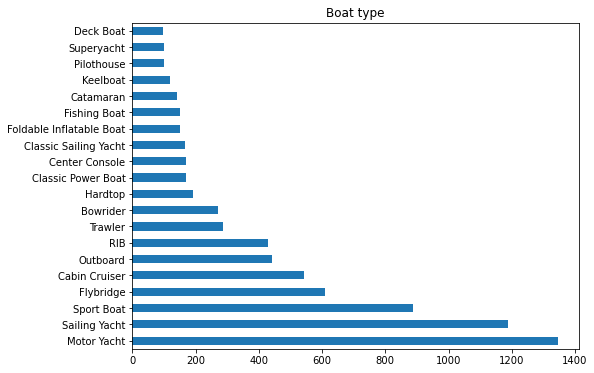

In [88]:
# THE MOTOR YACHT IS THE MOST COMMON BOAT TYPE

plt.figure(figsize=(8,6))
plt.title('Boat type')

df_04.Type.value_counts()[:20].plot(kind='barh')

<AxesSubplot:title={'center':'Location frequency'}>

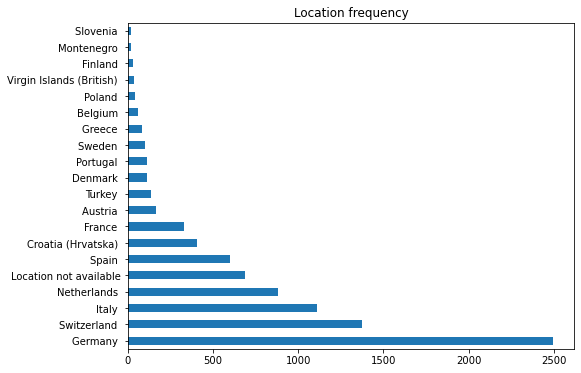

In [89]:
# MOST OF THE BOATS ARE LOCATED IN GERMANY

plt.figure(figsize=(8,6))
plt.title('Location frequency')

df_04.Location.value_counts()[:20].plot(kind='barh')

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

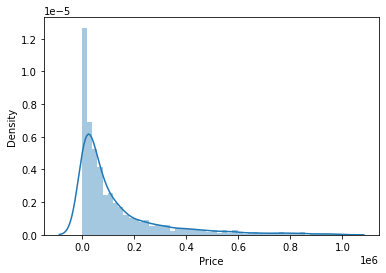

In [90]:
sns.distplot(df_04[df_04.Price<1000000].Price)

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

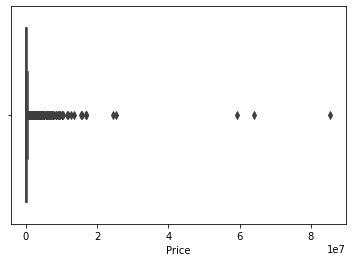

In [91]:
# LARGE OUTLIERS IN PRICE

sns.boxplot(df_04.Price)

In [92]:
df_04.drop(df_04[df_04.Price > 20000000].index,axis=0,inplace=True)

C:\Users\croatia\AppData\Local\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

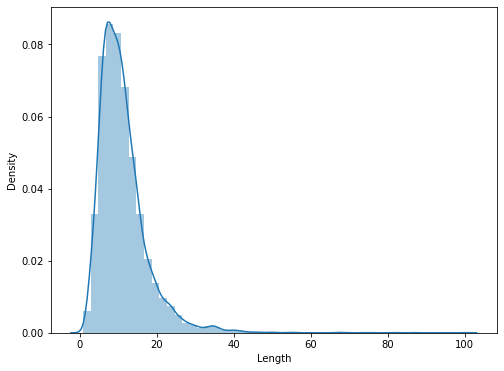

In [93]:
# MOST BOATS ARE BETWEEN 8 AND 15 METERS IN LENGTH

# WE NOTICE ALSO OUTLIERS IN THE DATA BECAUSE OF THE SKEWED DISTRIBUTION

plt.figure(figsize=(8,6))

sns.distplot(df_04.Length)

<AxesSubplot:xlabel='Width', ylabel='Count'>

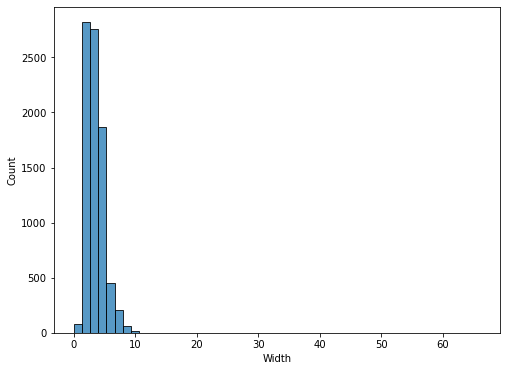

In [94]:
plt.figure(figsize=(8,6))

sns.histplot(df_04.Width,bins=50)

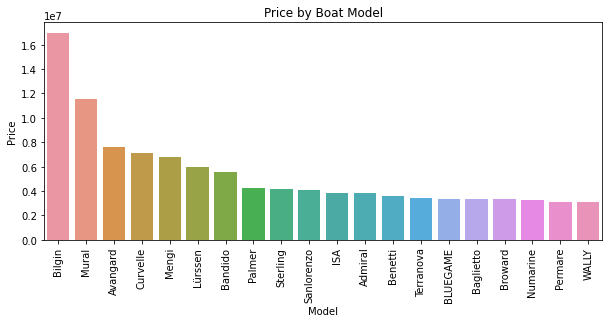

In [95]:
# PRICE BY MODEL
# BILGIN IS THE MOST EXPENSIVE BOAT MODEL WHICH IS NOT SUPRISING BECAUSE THE PRODUCE SUPERYACHTS

plt.figure(figsize=(10,4))

price_model = df_04.groupby('Model').agg({'Price':'mean'}).reset_index().sort_values(by='Price',ascending=False)[:20]

sns.barplot(data=price_model,x='Model',y='Price')
plt.title('Price by Boat Model')
plt.xticks(rotation=90)
plt.show()

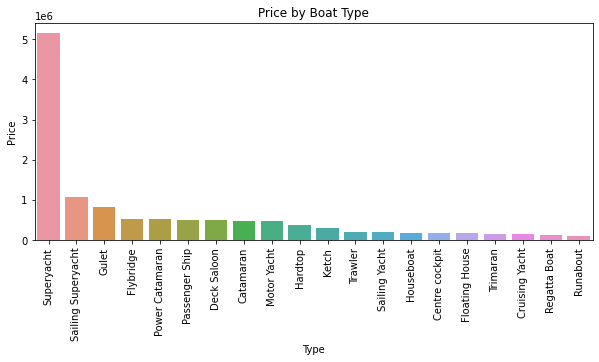

In [96]:
# PRICE BY BOAT TYPE
# SUPERYACHTS ARE THE MOST EXPENSIVE TYPE OF BOAT WHICH IS ALSO NOT SUPRISING

plt.figure(figsize=(10,4))

price_type = df_04.groupby('Type').agg({'Price':'mean'}).reset_index().sort_values(by='Price',ascending=False)[:20]

sns.barplot(data=price_type,x='Type',y='Price')
plt.title('Price by Boat Type')
plt.xticks(rotation=90)
plt.show()

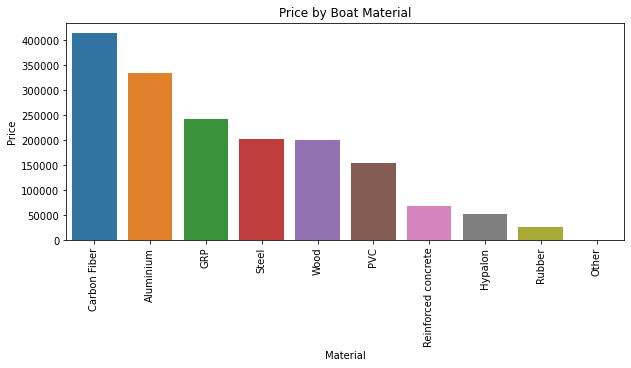

In [97]:
# PRICE BY BOAT MATERIAL
# CARBON FIBER IS KNOWN TO BE VERY EXPENSIVE

plt.figure(figsize=(10,4))

price_material = df_04.groupby('Material').agg({'Price':'mean'}).reset_index().sort_values(by='Price',ascending=False)[:20]

sns.barplot(data=price_material,x='Material',y='Price')
plt.title('Price by Boat Material')
plt.xticks(rotation=90)
plt.show()

In [98]:
model_list = df_04.Model.value_counts()[50:].index

In [99]:
df_04.Model.replace(model_list,'Other',inplace=True)

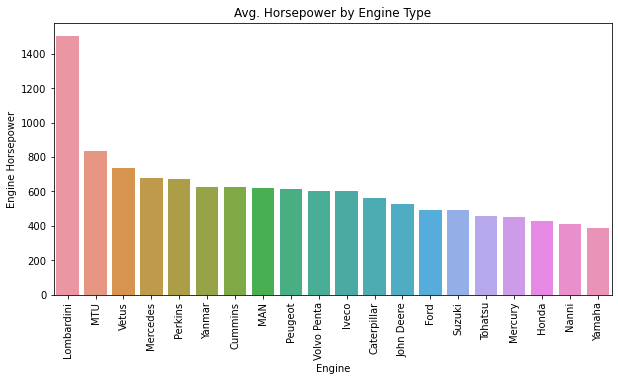

In [100]:
# AVG HORSEPOWER PER ENGINE TYPE
# LOMBARDINI IS KNOWN TO PRODUCE ENGINES FOR VERY FAST POWERBOATS AND MOTOR YACHTS

engine_power = df_04.groupby('Engine').agg({'Engine Horsepower':'mean'}).reset_index().sort_values(by='Engine Horsepower',ascending=False)[:20]

plt.figure(figsize=(10,5))
sns.barplot(data=engine_power,x='Engine',y='Engine Horsepower')
plt.title('Avg. Horsepower by Engine Type')
plt.xticks(rotation=90)
plt.show()

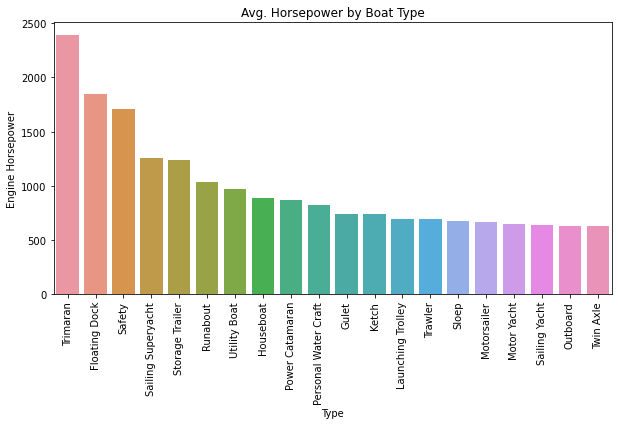

In [101]:
# AVG HORSEPOWER PER BOAT TYPE

type_power = df_04.groupby('Type').agg({'Engine Horsepower':'mean'}).reset_index().sort_values(by='Engine Horsepower',ascending=False)[:20]

plt.figure(figsize=(10,5))
sns.barplot(data=type_power,x='Type',y='Engine Horsepower')
plt.title('Avg. Horsepower by Boat Type')
plt.xticks(rotation=90)
plt.show()

In [102]:
df_04.drop(df_04[df_04['Type']=='Floating Dock'].index,axis=0,inplace=True)

In [103]:
df_04.drop(df_04[df_04['Type']=='Safety'].index,axis=0,inplace=True)

In [104]:
df_04.drop(df_04[df_04['Type']=='Storage Trailer'].index,axis=0,inplace=True)

<AxesSubplot:xlabel='Length', ylabel='Width'>

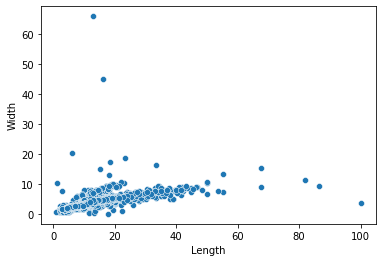

In [105]:
sns.scatterplot(data=df_04,x='Length',y='Width')

<AxesSubplot:xlabel='Length', ylabel='Price'>

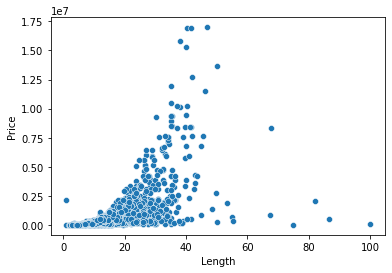

In [106]:
# LENGTH AND PRICE HAVE SOLID POSITIVE CORRELATION

sns.scatterplot(data=df_04,x='Length',y='Price')

<AxesSubplot:title={'center':'Correlation matrix'}>

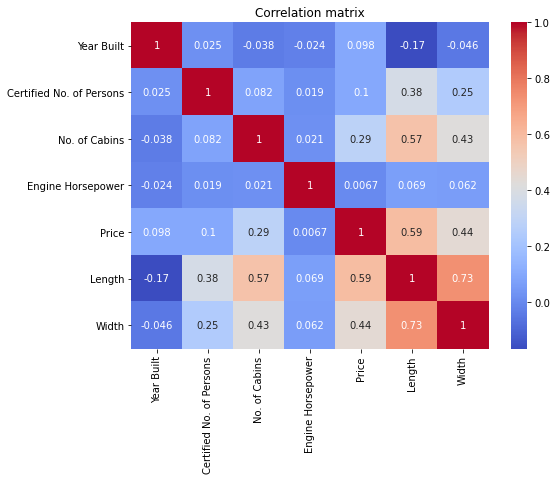

In [107]:
plt.figure(figsize=(8,6))
plt.title('Correlation matrix')
sns.heatmap(df_04.corr(),cmap='coolwarm',annot=True)

In [108]:
df_04.corrwith(df_04.Price)

Year Built                  0.098317
Certified No. of Persons    0.101221
No. of Cabins               0.285904
Engine Horsepower           0.006730
Price                       1.000000
Length                      0.594100
Width                       0.444703
dtype: float64

<Figure size 720x576 with 0 Axes>

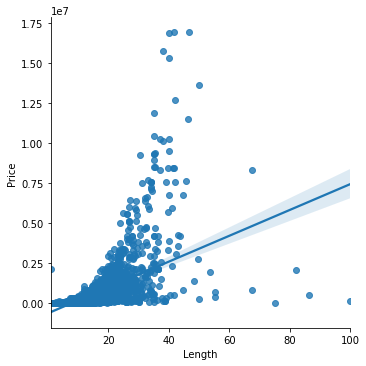

In [109]:
plt.figure(figsize=(10,8))

sns.lmplot(data=df_04,y='Price',x='Length')

<Figure size 720x576 with 0 Axes>

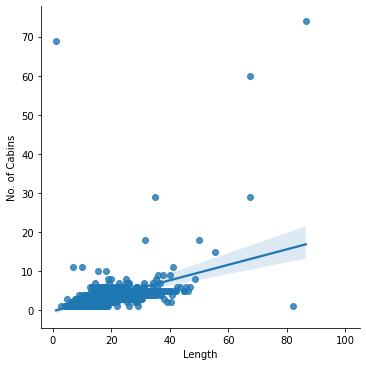

In [110]:
plt.figure(figsize=(10,8))

sns.lmplot(data=df_04,y='No. of Cabins',x='Length')

<Figure size 720x576 with 0 Axes>

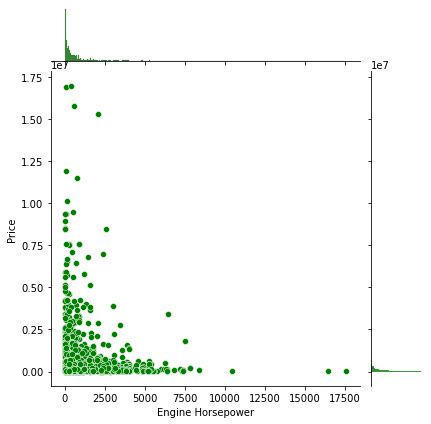

In [111]:
plt.figure(figsize=(10,8))

sns.jointplot(data=df_04,y='Price',x='Engine Horsepower',color='green')

<Figure size 720x576 with 0 Axes>

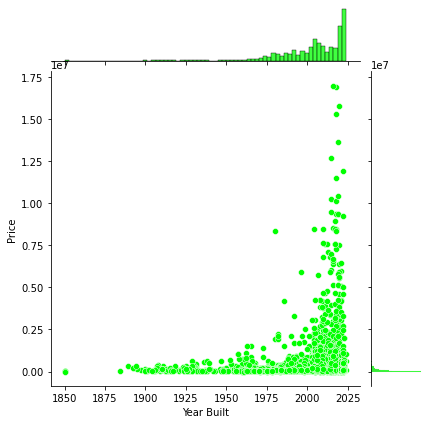

In [112]:
plt.figure(figsize=(10,8))

sns.jointplot(data=df_04,y='Price',x='Year Built',color='lime')

In [113]:
df_04.isnull().sum()/df_04.shape[0]*100

Year Built                   9.602501
Condition                   68.233586
Material                    23.604288
Certified No. of Persons    61.322019
No. of Cabins               48.101831
Propulsion                  49.006253
Engine                      25.234480
Engine Horsepower           31.208129
Model                        0.000000
Type                         0.011166
Location                     0.000000
Price                        0.000000
Length                       6.889236
Width                        7.670835
dtype: float64

## Dealing with missing data

In [114]:
df_05 = df_04.copy()

In [115]:
# WE WILL DROP THIS BECAUSE A LOT OF MISSING DATA

df_05.drop('Condition',axis=1,inplace=True)

In [117]:
# WE WILL SIMPLY REPLACE NANS WITH "OTEHR" FOR MATERIAL

df_05.Material.fillna('Other',inplace=True)

In [118]:
# MAKING A CLASSIFIER FOR BOATS BY LENGTH SO IT WILL BE EASIER TO FILL IN OTHER NANS LIKE MISSING NO OF CABINS

def classifier(array):
    temp_list = []
    for i in array:
        try:
            if pd.isna(i)==False:
                if i<=5:
                    temp_list.append('A')
                elif (i>5) & (i<=8):
                    temp_list.append('1')
                elif (i>8) & (i<=12):
                    temp_list.append('2')
                elif (i>12) & (i<=20):
                    temp_list.append('3')
                else:
                    temp_list.append('Superyacht')
            else:
                temp_list.append(np.nan)
        except:
            temp_list.append(np.nan)
    return temp_list

In [119]:
df_05['Class'] = classifier(df_05.Length)

In [120]:
df_05.groupby('Class').agg({'No. of Cabins':'mean'})

,No. of Cabins
Class,
1,1.123989
2,1.797674
3,2.851609
A,6.833333
Superyacht,4.527383


In [121]:
df_05.groupby('Class').agg({'Certified No. of Persons':'mean'})

,Certified No. of Persons
Class,
1,7.594044
2,8.991848
3,11.036269
A,4.817927
Superyacht,17.798611


In [122]:
# CLASS A WILL HAVE 1 CABIN AND 5 PEOPLE
# CLASS 1 WILL HAVE 1 CABIN AND 8 PEOPLE
# CLASS 2 WILL HAVE 2 CABINS AND 9 PEOPLE
# CLASS 3 WILL HAVE 3 CABINS AND 11 PEOPLE
# CLASS SY WILL HAVE 5 CABINS AND 18 PEOPLE

In [123]:
# INSTEAD OF JUST TAKING THE MEAN OF EVERYTHING WE WILL USE THE MEAN FOR THE BOAT CLASS (BY SIZE)

def impute_cabins(cols):
    cabins = cols[0]
    b_class = cols[1]
    
    if pd.isna(cabins):
        if b_class == 1:
            return 1
        elif b_class == 2:
            return 2
        elif b_class == 3:
            return 3
        elif b_class == 'Superyacht':
            return 5
        else:
            return 1
    else:
        return cabins

In [124]:
df_05['No. of Cabins'] = df_05[['No. of Cabins','Class']].apply(impute_cabins,axis=1)

In [125]:
def impute_persons(cols):
    persons = cols[0]
    b_class = cols[1]
    
    if pd.isna(persons):
        if b_class == 1:
            return 8
        elif b_class == 2:
            return 9
        elif b_class == 3:
            return 11
        elif b_class == 'Superyacht':
            return 18
        else:
            return 5
    else:
        return persons

In [126]:
df_05['Certified No. of Persons'] = df_05[['Certified No. of Persons','Class']].apply(impute_persons,axis=1)

In [128]:
df_05['Propulsion'].isnull().sum()/df_05.shape[0]

0.4900625279142474

In [129]:
df_05['Propulsion'].value_counts()

Inboard Direct-Drive     1715
Outboard, four-stroke    1428
Sterndrive                919
Saildrive                 256
Inboard V-Drive            76
POD Drive                  73
Outboard, two-stroke       48
Jet Drive                  25
Forward Drive              19
Surface Drive               6
Hydraulic Drive             2
Name: Propulsion, dtype: int64

<AxesSubplot:>

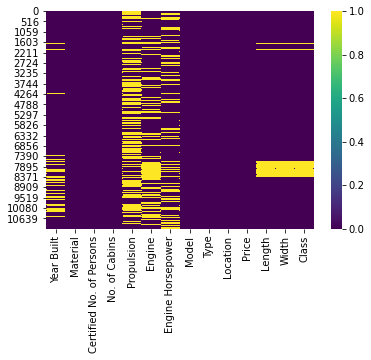

In [130]:
sns.heatmap(df_05.isnull(),cmap='viridis')

In [131]:
df_06 = df_05.copy()

In [132]:
df_06.drop('Propulsion',axis=1,inplace=True)

<AxesSubplot:>

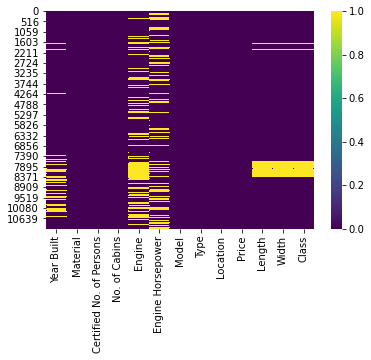

In [133]:
sns.heatmap(df_06.isnull(),cmap='viridis')

In [157]:
engine_hp = df_06.groupby('Engine').agg({'Engine Horsepower':'mean'})

In [136]:
df_06.Engine.fillna('Other',inplace=True)

In [137]:
# WE WILL REPLACE THE HP BY AVERAGING PER ENGINE MODEL

def impute_hp(cols):
    engine = cols[0]
    horsepower = cols[1]
    
    if pd.isna(horsepower):
        for k,v in engine_dict.items():
            if engine in k:
                return v
            else:
                continue
    else:
        return horsepower

In [158]:
engine_dict = engine_hp.to_dict()['Engine Horsepower']

In [159]:
engine_dict

{'Caterpillar': 560.8662857142866,
 'Cummins': 623.6590909090902,
 'Ford': 494.4642857142857,
 'Honda': 429.6844660194177,
 'Iveco': 602.4838709677421,
 'John Deere': 525.8999999999999,
 'Lombardini': 1505.2,
 'MAN': 617.092532467532,
 'MTU': 833.5583333333328,
 'Mercedes': 679.528,
 'Mercury': 449.5491483016523,
 'Nanni': 410.28596491228063,
 'Other': 549.2535070140281,
 'PIKTRONIK': 176.5714285714286,
 'Perkins': 672.0309278350511,
 'Peugeot': 617.0,
 'Suzuki': 493.406300442593,
 'Tohatsu': 457.25,
 'Vetus': 738.1825581395346,
 'Volvo Penta': 604.7874209860881,
 'Yamaha': 389.2886867160352,
 'Yanmar': 619.4075043615674}

In [160]:
df_06['Engine Horsepower'] = df_06[['Engine','Engine Horsepower']].apply(impute_hp,axis=1)

In [143]:
df_06['Year Built'].fillna(df_06['Year Built'].mean(),inplace=True)

In [144]:
# WE GROUP LENGTH BY BOAT MODEL

length_dict = df_06.groupby('Model').agg({'Length':'mean'}).to_dict()['Length']

In [145]:
def impute_len(cols):
    model = cols[0]
    length = cols[1]
    
    if pd.isna(length):
        for k,v in length_dict.items():
            if model in k:
                return v
            else:
                continue
    else:
        return length

In [146]:
df_06['Length'] = df_06[['Model','Length']].apply(impute_len,axis=1)

In [147]:
# WE GROUP WIDTH BY BOAT MODEL

width_dict = df_06.groupby('Model').agg({'Width':'mean'}).to_dict()['Width']

In [148]:
def impute_wid(cols):
    model = cols[0]
    width = cols[1]
    
    if pd.isna(width):
        for k,v in width_dict.items():
            try:
                if model in k:
                    return v
                else:
                    continue
            except:
                continue
    else:
        return width

In [149]:
df_06['Width'] = df_06[['Model','Width']].apply(impute_wid,axis=1)

In [150]:
df_06 = df_06[~df_06['Length'].isnull()]

## DATA CLEANED, IT'S TIME TO PREPARE FOR MODELING

In [162]:
df_06['Year Built'] = df_06['Year Built'].astype('int')
df_06['Certified No. of Persons'] = df_06['Certified No. of Persons'].astype('int')
df_06['No. of Cabins'] = df_06['No. of Cabins'].astype('int')
df_06['Engine Horsepower'] = df_06['Engine Horsepower'].astype('int')

In [163]:
df_06.Material.value_counts()

GRP                    4992
Other                  2041
Steel                   709
Wood                    339
Aluminium               327
PVC                     258
Hypalon                  98
Carbon Fiber             90
Rubber                   22
Reinforced concrete       2
Name: Material, dtype: int64

In [164]:
# DROP UNECESSARY ROWS

df_06.drop(df_06[df_06.Material=='Reinforced concrete'].index,axis=0,inplace=True)

In [165]:
types = df_06.Type.value_counts()[20:].index

In [166]:
df_06.Type.replace({'Flybridge':'Motor Yacht',
                   'Cabin Cruiser':'Motor Yacht',
                   'Center Console':'Sport Boat',
                   'Classic Sailing Yacht':'Sailing Yacht',
                   'Trawler':'Fishing Boat',
                   'Pilothouse':'Hardtop'},inplace=True)

In [167]:
df_06.Type.replace(types,'Other',inplace=True)

In [168]:
df_06.Type.value_counts()

Motor Yacht                 2497
Other                       1376
Sailing Yacht               1354
Sport Boat                  1057
Fishing Boat                 437
RIB                          428
Outboard                     395
Hardtop                      291
Bowrider                     270
Classic Power Boat           170
Foldable Inflatable Boat     149
Catamaran                    140
Keelboat                     118
Deck Boat                     97
Superyacht                    96
Name: Type, dtype: int64

In [169]:
locations = df_06.Location.value_counts()[20:].index

In [170]:
# KEEP ONLY TOP 20 LOCATIONS, REPLACE OTHERS WITH "OTHERS"

df_06.Location.replace(locations,'Other',inplace=True)

In [171]:
# DROP LOCATION NOT AVAILABLE ROWS

df_06.drop(df_06[df_06.Location=='Location not available'].index,axis=0,inplace=True)

In [173]:
# DROP OUTLIYING PRICES

df_06.drop(df_06[df_06.Price>2000000].index,axis=0,inplace=True)

In [174]:
df_06.drop(df_06[df_06['No. of Cabins']>12].index,axis=0,inplace=True)

In [175]:
df_06.drop(df_06[df_06['Certified No. of Persons']>26].index,axis=0,inplace=True)

In [176]:
df_06.drop('Certified No. of Persons',axis=1,inplace=True)

In [177]:
df_07 = df_06.copy()

In [178]:
# DROPPING OUTLIERS IN THE PRICE

df_07.drop(df_07[df_07.Price>500000].index,axis=0,inplace=True)

In [179]:
# ENCODE THE CATEGORICAL VALUES

X = df_07.drop(['Price','Class'],axis=1)
y = df_07['Price']

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
material_dummies = pd.get_dummies(df_07['Material'],drop_first=True,prefix='mat')
engine_dummies = pd.get_dummies(df_07['Engine'],drop_first=True,prefix='eng')
model_dummies = pd.get_dummies(df_07['Model'],drop_first=True,prefix='mod')
type_dummies = pd.get_dummies(df_07['Type'],drop_first=True,prefix='typ')
location_dummies = pd.get_dummies(df_07['Location'],drop_first=True,prefix='loc')

In [182]:
X = pd.concat([X, material_dummies, engine_dummies, model_dummies, type_dummies, location_dummies],axis=1)

In [183]:
X = X.drop(['Material','Engine','Model','Type','Location'],axis=1)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [186]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [187]:
scaler = MinMaxScaler()

In [188]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
linear_01 = LinearRegression()

In [190]:
linear_01.fit(X_train,y_train)

LinearRegression()

In [191]:
pred_01 = linear_01.predict(X_test)

Text(0, 0.5, 'Predicted values')

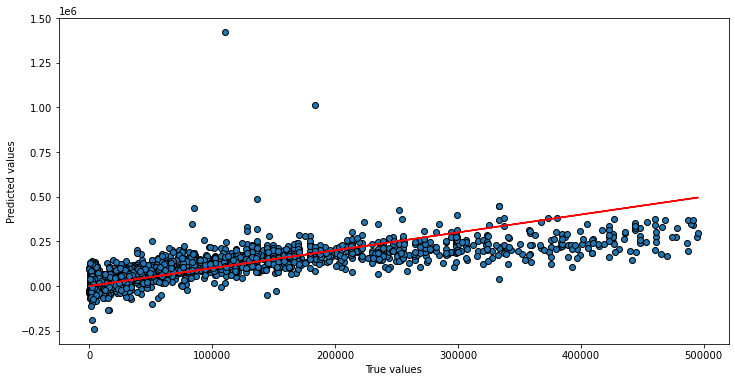

In [192]:
plt.figure(figsize=(12,6))

plt.scatter(y_test,pred_01,edgecolor='black')
plt.plot(y_test,y_test,color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')

In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [194]:
print(f'The mean absolute error is: {mean_absolute_error(y_test,pred_01)}')
print(f'The mean squared error is: {mean_squared_error(y_test,pred_01)}')

The mean absolute error is: 45667.50154587454
The mean squared error is: 5200817068.732773


In [238]:
# NEURAL NETWORKS

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [196]:
def mae(y_test,pred):
    return tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(pred))

def mse(y_test,pred):
    return tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(pred))

In [197]:
model_1 = Sequential()

model_1.add(Dense(121, activation='relu'))
model_1.add(Dense(121, activation='relu'))

model_1.add(Dense(1))

model_1.compile(optimizer='adam',loss='mae')

In [198]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=1,
                          patience=10)

In [199]:
model_1.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=early_stop)

Epoch 1/500
165/165 [==============================] - 2s 5ms/step - loss: 92556.1016 - val_loss: 96400.5312
Epoch 2/500
165/165 [==============================] - 1s 3ms/step - loss: 88388.4531 - val_loss: 88725.7969
Epoch 3/500
165/165 [==============================] - 1s 4ms/step - loss: 78710.2500 - val_loss: 78151.7188
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 71462.8359 - val_loss: 73031.8359
Epoch 5/500
165/165 [==============================] - 1s 4ms/step - loss: 68332.7969 - val_loss: 70579.0938
Epoch 6/500
165/165 [==============================] - 1s 4ms/step - loss: 66511.1016 - val_loss: 68852.2734
Epoch 7/500
165/165 [==============================] - 1s 4ms/step - loss: 64993.0547 - val_loss: 67323.0391
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 63667.1445 - val_loss: 66023.6484
Epoch 9/500
165/165 [==============================] - 1s 4ms/step - loss: 62624.8672 - val_loss: 64952.5469
Epoch 10/500
165/16

165/165 [==============================] - 1s 4ms/step - loss: 37413.4297 - val_loss: 39946.3438
Epoch 150/500
165/165 [==============================] - 1s 4ms/step - loss: 37305.2148 - val_loss: 39849.8516
Epoch 151/500
165/165 [==============================] - 1s 4ms/step - loss: 37187.1602 - val_loss: 39764.0586
Epoch 152/500
165/165 [==============================] - 1s 4ms/step - loss: 37092.2773 - val_loss: 39680.9883
Epoch 153/500
165/165 [==============================] - 1s 4ms/step - loss: 36970.3906 - val_loss: 39616.3711
Epoch 154/500
165/165 [==============================] - 1s 4ms/step - loss: 36899.9062 - val_loss: 39530.7344
Epoch 155/500
165/165 [==============================] - 1s 4ms/step - loss: 36751.4883 - val_loss: 39438.3867
Epoch 156/500
165/165 [==============================] - 1s 4ms/step - loss: 36670.1758 - val_loss: 39378.9102
Epoch 157/500
165/165 [==============================] - 1s 4ms/step - loss: 36568.0312 - val_loss: 39270.5859
Epoch 158/500
1

Epoch 223/500
165/165 [==============================] - 1s 4ms/step - loss: 31649.9160 - val_loss: 36542.2383
Epoch 224/500
165/165 [==============================] - 1s 3ms/step - loss: 31594.5879 - val_loss: 36559.8008
Epoch 225/500
165/165 [==============================] - 1s 4ms/step - loss: 31553.8008 - val_loss: 36517.9492
Epoch 226/500
165/165 [==============================] - 1s 4ms/step - loss: 31504.2051 - val_loss: 36471.1133
Epoch 227/500
165/165 [==============================] - 1s 4ms/step - loss: 31448.6074 - val_loss: 36528.3828
Epoch 228/500
165/165 [==============================] - 1s 4ms/step - loss: 31415.0879 - val_loss: 36432.3633
Epoch 229/500
165/165 [==============================] - 1s 4ms/step - loss: 31377.4141 - val_loss: 36425.5078
Epoch 230/500
165/165 [==============================] - 1s 4ms/step - loss: 31293.3555 - val_loss: 36391.5078
Epoch 231/500
165/165 [==============================] - 1s 4ms/step - loss: 31250.3535 - val_loss: 36366.5938
E

Epoch 297/500
165/165 [==============================] - 1s 4ms/step - loss: 28624.3711 - val_loss: 35321.8164
Epoch 298/500
165/165 [==============================] - 1s 4ms/step - loss: 28592.1680 - val_loss: 35329.7656
Epoch 299/500
165/165 [==============================] - 1s 4ms/step - loss: 28535.9688 - val_loss: 35263.0000
Epoch 300/500
165/165 [==============================] - 1s 4ms/step - loss: 28530.5000 - val_loss: 35239.8047
Epoch 301/500
165/165 [==============================] - 1s 4ms/step - loss: 28490.3281 - val_loss: 35265.6797
Epoch 302/500
165/165 [==============================] - 1s 3ms/step - loss: 28479.9668 - val_loss: 35291.4023
Epoch 303/500
165/165 [==============================] - 1s 4ms/step - loss: 28411.6699 - val_loss: 35203.5312
Epoch 304/500
165/165 [==============================] - 1s 4ms/step - loss: 28397.5957 - val_loss: 35249.8867
Epoch 305/500
165/165 [==============================] - 1s 4ms/step - loss: 28338.2188 - val_loss: 35268.6914
E

Epoch 371/500
165/165 [==============================] - 1s 4ms/step - loss: 26223.1562 - val_loss: 34734.0352
Epoch 372/500
165/165 [==============================] - 1s 3ms/step - loss: 26197.7148 - val_loss: 34495.9570
Epoch 373/500
165/165 [==============================] - 1s 4ms/step - loss: 26142.9082 - val_loss: 34536.5352
Epoch 374/500
165/165 [==============================] - 1s 4ms/step - loss: 26127.5371 - val_loss: 34574.3555
Epoch 375/500
165/165 [==============================] - 1s 4ms/step - loss: 26081.3438 - val_loss: 34558.3242
Epoch 376/500
165/165 [==============================] - 1s 4ms/step - loss: 26051.0684 - val_loss: 34518.1250
Epoch 377/500
165/165 [==============================] - 1s 4ms/step - loss: 26010.8125 - val_loss: 34501.7852
Epoch 378/500
165/165 [==============================] - 1s 4ms/step - loss: 25987.8438 - val_loss: 34478.6797
Epoch 379/500
165/165 [==============================] - 1s 4ms/step - loss: 25977.5664 - val_loss: 34444.1445
E

In [200]:
model_1_loss = pd.DataFrame(model_1.history.history)

<AxesSubplot:>

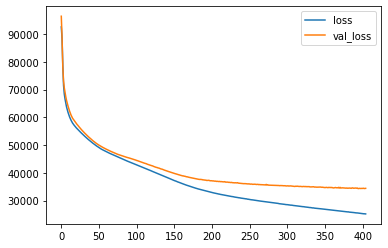

In [201]:
model_1_loss.plot()

In [202]:
pred_1 = model_1.predict(X_test)

In [204]:
#print(f'The mean absolute error is: {mean_absolute_error(y_test,pred_02)}')
#print(f'The mean squared error is: {mean_squared_error(y_test,pred_02)}')

In [205]:
mae_1 = mae(y_test,pred_1)
print(mae_1)
mse_1 = mse(y_test,pred_1)
print(mse_1)

tf.Tensor(34381.004, shape=(), dtype=float32)
tf.Tensor(9830265000.0, shape=(), dtype=float32)


In [206]:
# INCREASE THE NUMBER OF LAYERS

model_2 = Sequential()

model_2.add(Dense(121, activation='relu'))
model_2.add(Dense(121, activation='relu'))
model_2.add(Dense(121, activation='relu'))


model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mae')

In [207]:
model_2.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=early_stop)

Epoch 1/500
165/165 [==============================] - 2s 5ms/step - loss: 89189.7734 - val_loss: 80138.5547
Epoch 2/500
165/165 [==============================] - 1s 4ms/step - loss: 68909.4062 - val_loss: 68847.2500
Epoch 3/500
165/165 [==============================] - 1s 4ms/step - loss: 63418.0703 - val_loss: 64194.4453
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 60073.8086 - val_loss: 60981.7734
Epoch 5/500
165/165 [==============================] - 1s 3ms/step - loss: 58073.3984 - val_loss: 58982.9766
Epoch 6/500
165/165 [==============================] - 1s 4ms/step - loss: 56594.0156 - val_loss: 57574.3359
Epoch 7/500
165/165 [==============================] - 1s 4ms/step - loss: 55477.0469 - val_loss: 56218.1289
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 54397.8906 - val_loss: 55080.0859
Epoch 9/500
165/165 [==============================] - 1s 4ms/step - loss: 53411.4375 - val_loss: 54000.2617
Epoch 10/500
165/16

In [208]:
model_2_loss = pd.DataFrame(model_2.history.history)

<AxesSubplot:>

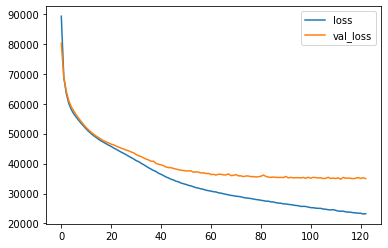

In [209]:
model_2_loss.plot()

In [210]:
pred_2 = model_2.predict(X_test)

In [211]:
mae_2 = mae(y_test,pred_2)
print(mae_2)
mse_2 = mse(y_test,pred_2)
print(mse_2)

tf.Tensor(34995.543, shape=(), dtype=float32)
tf.Tensor(14412964000.0, shape=(), dtype=float32)


In [239]:
# INCREASE THE NUMBER OF NEURONS IN ORIGINAL

model_3 = Sequential()

model_3.add(Dense(121, activation='relu'))
model_3.add(Dense(343, activation='relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mae')

In [240]:
model_3.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=early_stop)

Epoch 1/500
165/165 [==============================] - 2s 5ms/step - loss: 92155.4844 - val_loss: 94690.8672
Epoch 2/500
165/165 [==============================] - 1s 4ms/step - loss: 83585.3750 - val_loss: 80765.0000
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 72211.6719 - val_loss: 72735.0234
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 67896.2109 - val_loss: 69852.9688
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 65646.3047 - val_loss: 67613.3594
Epoch 6/500
165/165 [==============================] - 1s 6ms/step - loss: 63850.9414 - val_loss: 65889.4844
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 62338.2852 - val_loss: 64462.8477
Epoch 8/500
165/165 [==============================] - 1s 5ms/step - loss: 61199.1172 - val_loss: 63141.9102
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 60092.3984 - val_loss: 62071.0625
Epoch 10/500
165/16

165/165 [==============================] - 1s 5ms/step - loss: 33443.0391 - val_loss: 37201.7617
Epoch 150/500
165/165 [==============================] - 1s 5ms/step - loss: 33254.0820 - val_loss: 37174.9883
Epoch 151/500
165/165 [==============================] - 1s 5ms/step - loss: 33311.5859 - val_loss: 37118.9180
Epoch 152/500
165/165 [==============================] - 1s 5ms/step - loss: 33299.5742 - val_loss: 37116.0977
Epoch 153/500
165/165 [==============================] - 1s 5ms/step - loss: 33037.7344 - val_loss: 37043.0703
Epoch 154/500
165/165 [==============================] - 1s 5ms/step - loss: 33034.5508 - val_loss: 36984.2617
Epoch 155/500
165/165 [==============================] - 1s 5ms/step - loss: 32933.9453 - val_loss: 36986.4492
Epoch 156/500
165/165 [==============================] - 1s 5ms/step - loss: 32893.7734 - val_loss: 37005.8242
Epoch 157/500
165/165 [==============================] - 1s 5ms/step - loss: 32914.6172 - val_loss: 36970.2266
Epoch 158/500
1

Epoch 223/500
165/165 [==============================] - 1s 5ms/step - loss: 29263.5059 - val_loss: 35345.6602
Epoch 224/500
165/165 [==============================] - 1s 5ms/step - loss: 29269.7227 - val_loss: 35320.1992
Epoch 225/500
165/165 [==============================] - 1s 5ms/step - loss: 29230.9922 - val_loss: 35268.7148
Epoch 226/500
165/165 [==============================] - 1s 5ms/step - loss: 29119.6504 - val_loss: 35268.5273
Epoch 227/500
165/165 [==============================] - 1s 5ms/step - loss: 29199.5879 - val_loss: 35268.6094
Epoch 228/500
165/165 [==============================] - 1s 5ms/step - loss: 29001.3438 - val_loss: 35271.4219
Epoch 229/500
165/165 [==============================] - 1s 5ms/step - loss: 29011.1973 - val_loss: 35242.4375
Epoch 230/500
165/165 [==============================] - 1s 5ms/step - loss: 29029.0684 - val_loss: 35409.3828
Epoch 231/500
165/165 [==============================] - 1s 5ms/step - loss: 28758.0254 - val_loss: 35335.3867
E

Epoch 297/500
165/165 [==============================] - 1s 5ms/step - loss: 26672.0586 - val_loss: 34665.3047
Epoch 298/500
165/165 [==============================] - 1s 5ms/step - loss: 26456.2617 - val_loss: 34677.2812
Epoch 299/500
165/165 [==============================] - 1s 5ms/step - loss: 26618.5605 - val_loss: 34694.2188
Epoch 300/500
165/165 [==============================] - 1s 5ms/step - loss: 26427.9824 - val_loss: 34769.8516
Epoch 301/500
165/165 [==============================] - 1s 5ms/step - loss: 26253.9375 - val_loss: 34628.7734
Epoch 301: early stopping


In [241]:
model_3_loss = pd.DataFrame(model_3.history.history)

<AxesSubplot:>

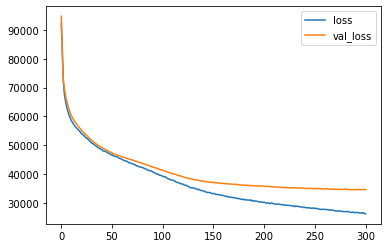

In [242]:
model_3_loss.plot()

In [243]:
pred_3 = model_3.predict(X_test)

In [244]:
mae_3 = mae(y_test,pred_3)
print(mae_3)
mse_3 = mse(y_test,pred_3)
print(mse_3)

tf.Tensor(34628.77, shape=(), dtype=float32)
tf.Tensor(10111264000.0, shape=(), dtype=float32)


In [237]:
# CHANGE THE OPTIMIZER TO SGD TO ORIGINAL MODEL

model_4 = Sequential()

model_4.add(Dense(121, activation='relu'))
model_4.add(Dense(121, activation='relu'))

model_4.add(Dense(1))

model_4.compile(optimizer='sgd',loss='mae')

NameError: name 'Dropout' is not defined

In [220]:
model_4.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=early_stop)

Epoch 1/500
165/165 [==============================] - 1s 4ms/step - loss: 78719.4062 - val_loss: 158368.8906
Epoch 2/500
165/165 [==============================] - 1s 4ms/step - loss: 60258.4492 - val_loss: 52109.4219
Epoch 3/500
165/165 [==============================] - 1s 4ms/step - loss: 56848.9805 - val_loss: 55797.2227
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 52944.3906 - val_loss: 76416.5781
Epoch 5/500
165/165 [==============================] - 1s 3ms/step - loss: 53612.9766 - val_loss: 71095.3984
Epoch 6/500
165/165 [==============================] - 1s 4ms/step - loss: 48771.7383 - val_loss: 69676.7266
Epoch 7/500
165/165 [==============================] - 1s 3ms/step - loss: 48902.0195 - val_loss: 44835.2109
Epoch 8/500
165/165 [==============================] - 1s 3ms/step - loss: 46205.3984 - val_loss: 125076.3672
Epoch 9/500
165/165 [==============================] - 1s 3ms/step - loss: 47609.9180 - val_loss: 91405.9766
Epoch 10/500
165/

In [221]:
model_4_loss = pd.DataFrame(model_4.history.history)

<AxesSubplot:>

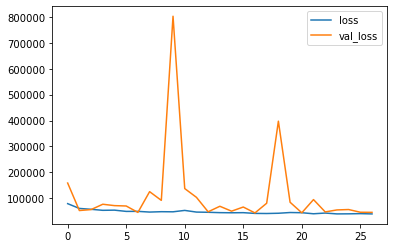

In [222]:
model_4_loss.plot()

In [223]:
pred_4 = model_4.predict(X_test)

In [224]:
mae_4 = mae(y_test,pred_4)
print(mae_4)
mse_4 = mse(y_test,pred_4)
print(mse_4)

tf.Tensor(45051.164, shape=(), dtype=float32)
tf.Tensor(8585146000.0, shape=(), dtype=float32)


In [233]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                ['model_2',mae_2.numpy(), mse_2.numpy()],
                ['model_3', mae_3.numpy(), mse_3.numpy()],
                ['model_4', mae_4.numpy(), mse_4.numpy()]]
model_df = pd.DataFrame(model_results, columns=['models', 'mae', 'mse'])
model_df

,models,mae,mse
0,model_1,34381.003906,9.830265e+09
1,model_2,34995.542969,1.441296e+10
2,model_3,34178.031250,1.053825e+10
3,model_4,45051.164062,8.585146e+09


In [232]:
# NN MODEL WORKS BETTER WITH MORE NEURONS BUT PERFORMS WORSE WITH MORE LAYERS